In [58]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

In [59]:
dir = '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])
# bright_nais.append('n8')
print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)


['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_trigdat_all_bn211014070_v01.fit']
bn211014070/current/glg
 
The brightest NaI detector is n0 - Source angle is: 11 deg
The brightest 3 NaI detectors are n0 ( 11 deg) n6 ( 30 deg) n1 ( 36 deg)
The brightest BGO detector is b0 ( 81 deg )
n0
['n0', 'n6', 'n1']
['b0']
['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_b0_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_b1_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n0_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n1_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n2_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n3_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n4_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/cu

In [60]:
NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

# NaI_detectors =  NaI_detectors[0:2]
# rsp_NaI_files =  rsp_NaI_files[0:2]
# rsp2_NaI_files = rsp2_NaI_files[0:2]

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n0_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n6_bn211014070_v00.fit', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_n1_bn211014070_v00.fit']
['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_tte_b0_bn211014070_v00.fit']
['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n0_bn211014070_v02.rsp', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n6_bn211014070_v02.rsp', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n1_bn211014070_v02.rsp']
['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n0_bn211014070_v02.rsp2', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n6_bn211014070_v02.rsp2', '/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_n1_bn211014070_v02.rsp2']
['/home/arpan-john/Desktop/cans/GRBC_bn211014070/current/glg_cspec_b0_bn211014070_v02.rsp']

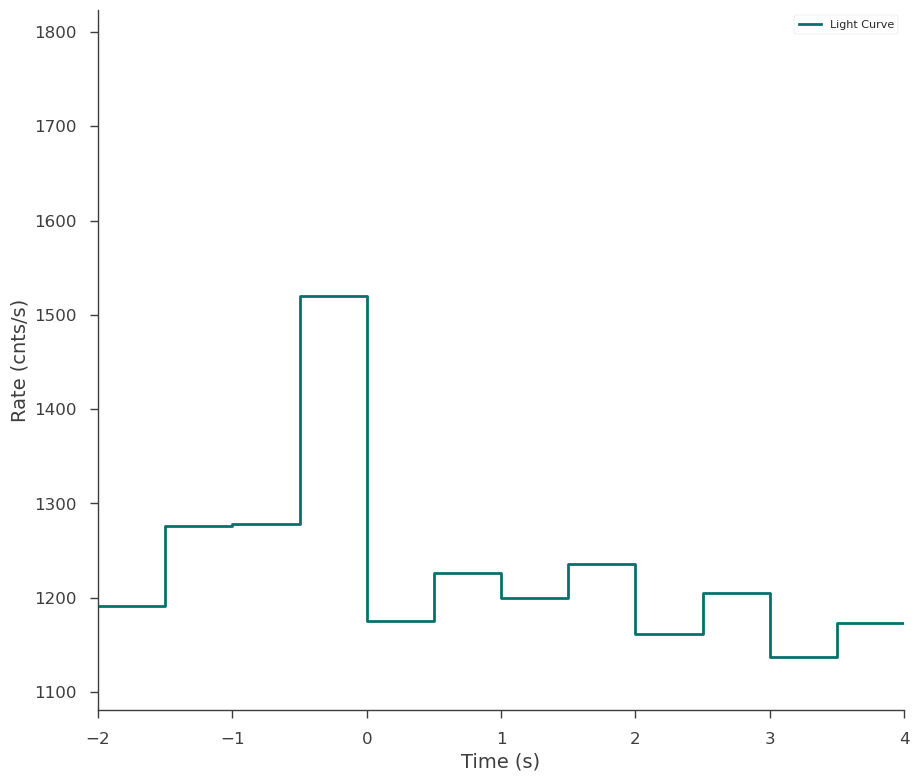

In [72]:
temp_ts = TimeSeriesBuilder.from_gbm_tte(
        'temp', 
        tte_file=NaI_detectors[0], 
        rsp_file=rsp_NaI_files[0])

# fig = temp_ts.view_lightcurve(cmin, cmax, dt = 0.1)
fig = temp_ts.view_lightcurve(-2, 4, dt = 0.5)

In [73]:
# set background interval
background_interval = ["-20 - -5","5 - 20"]

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

16:21:37 INFO      Auto-determined polynomial order: 0                                            ]8;id=17727;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=43409;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

16:21:45 INFO      None 0-order polynomial fit with the mle method                               ]8;id=212182;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=998462;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Interval set to -0.5-0.5 for temp                                     ]8;id=193901;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=367748;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

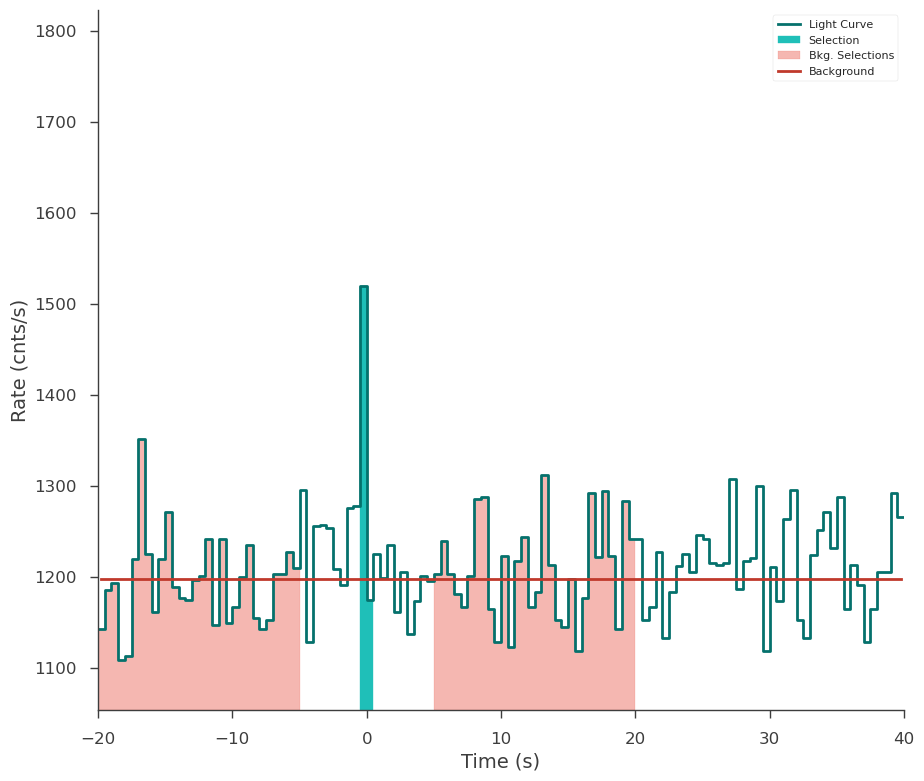

In [76]:
def find_act_inv(ts,cmin=cmin,cmax=cmax,type = 'short'):

    if type == 'long':
        dt = 1.024
    else:
        dt = 0.1
    ts.create_time_bins(start=-2, stop=4, method='constant',dt = dt)
    skip = 0
    flag = 0
    for sig,tot,bins in zip (ts.significance_per_interval[skip:],ts.total_counts_per_interval[skip:],ts.bins[skip:]):
        if sig > 3.5:
            print(tot,sig,bins)        
        bins = str(bins)
        if sig > 3.5 and flag == 0:
            start = float(bins.split(' ')[2])
            flag = 1
        if sig < 3.5 and flag == 1:
            stop = float(bins.split(' ')[2])
            break
    print(start)
    print(stop)
    print('time interval', stop - start)
    if (stop - start) < 2 and type == 'long':
        print('may be a short GRB')
    return start,stop


temp_ts = TimeSeriesBuilder.from_gbm_tte(
        'temp', 
        tte_file=NaI_detectors[0], 
        rsp_file=rsp_NaI_files[0])
temp_ts.set_background_interval(*background_interval)
# start , stop = find_act_inv(temp_ts)
# print([start, stop])
# fig = temp_ts.view_lightcurve(cmin,cmax,use_binner=True)
# temp_ts=0
# # set interval
source_interval = f'-0.5 - 0.5'
# source_interval = f'{start:.2f} - {stop:.2f}'
# source_tuple = (start,stop)
temp_ts.set_active_time_interval(source_interval)
fig = temp_ts.view_lightcurve(-20,40,dt = 0.5)


In [77]:
def select_bins_containing_interval(bins, interval):
  """
  This function selects bins from a list that contain a given interval.

  Args:
      bins: A list of bin edges (floats).
      interval: A tuple representing the interval (lower bound, upper bound).

  Returns:
      A list of bin indices that contain the interval.
  """

  # Check for invalid input
  if not isinstance(bins, list) or not isinstance(interval, tuple) or len(interval) != 2:
    raise ValueError("Invalid input: bins must be a list, interval must be a tuple of length 2.")

  # Find indices of bins where the lower bound is less than or equal to the interval's upper bound
  # and the upper bound is greater than or equal to the interval's lower bound
  return [i for i, bin_edge in enumerate(bins[:-1]) 
          if bin_edge <= interval[1] and bins[i+1] >= interval[0]]

# Example usage
bins = [0, 5, 10, 15, 20]
interval = (7, 12)
selected_bins = select_bins_containing_interval(bins, interval)

print(f"Selected bins: {selected_bins}")  # Output: Selected bins: [1, 2]
print(bins[selected_bins[0]], bins[1+selected_bins[-1]])



Selected bins: [1, 2]
5 15


In [78]:
print(type(fig))

<class 'matplotlib.figure.Figure'>


detector n0


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

16:21:46 INFO      Auto-determined polynomial order: 0                                            ]8;id=818443;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py\event_list.py]8;;\:]8;id=58997;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/event_list.py#538\538]8;;\

Fitting GBM_NAI_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

16:21:55 INFO      None 0-order polynomial fit with the mle method                               ]8;id=887939;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py\time_series.py]8;;\:]8;id=420164;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/time_series/time_series.py#458\458]8;;\

         INFO      Created 120 bins via constant                                         ]8;id=48048;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=287961;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#708\708]8;;\

         INFO      Interval set to -0.5-0.5 for n0                                       ]8;id=600043;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py\time_series_builder.py]8;;\:]8;id=558963;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/data_builders/time_series_builder.py#290\290]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=482397;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=563667;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#490\490]8;;\

         INFO      - observation: poisson                                                       ]8;id=160080;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=637419;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#491\491]8;;\

         INFO      - background: gaussian                                                       ]8;id=869346;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=349585;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#492\492]8;;\

         INFO      Range 9-900 translates to channels 4-123                                    ]8;id=647684;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=83476;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1247\1247]8;;\

         INFO      Now using 120 bins                                                          ]8;id=101617;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=81562;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/plugins/SpectrumLike.py#1739\1739]8;;\

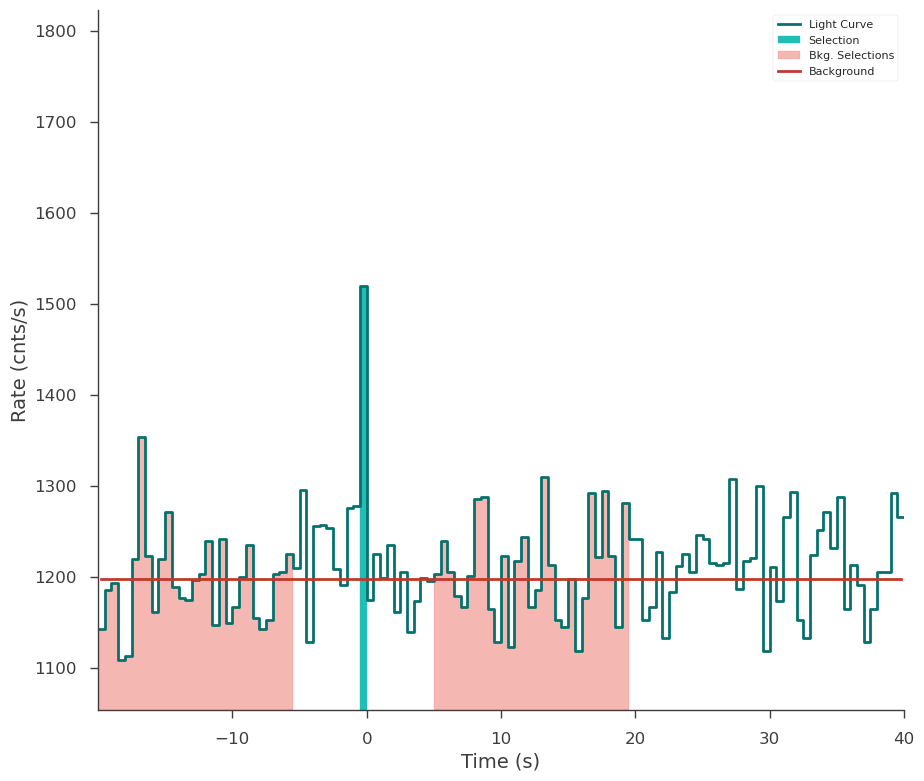

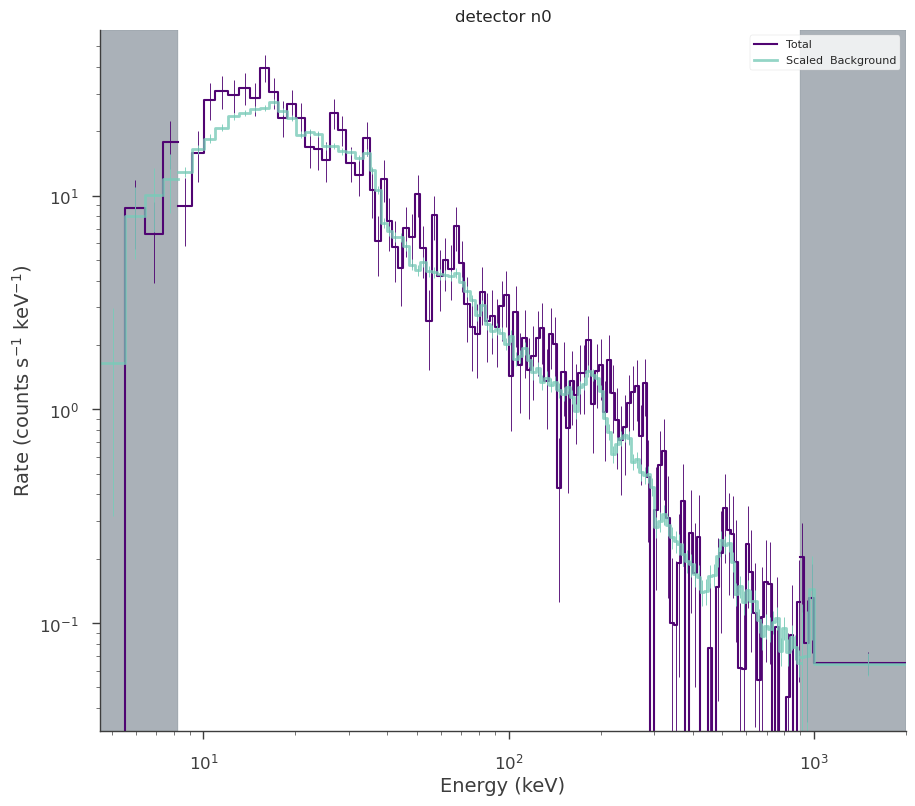

In [79]:
fluence_plugins = []
time_series = {}
for det,rsp in zip((NaI_detectors + BGO_detector),(rsp_NaI_files+rsp_BGO_file)):
    det_name = det.split('_')[-3]
    print('detector',det_name)
    ts = TimeSeriesBuilder.from_gbm_tte(
        det_name, tte_file=det, rsp_file=rsp
    )

    ts.set_background_interval(*background_interval)

    # # Bayes block method
    # ts.create_time_bins(
    #     start=-2, stop=4, method="bayesblocks", p0=0.01, use_background=True
    # )

    # bad_bins = []
    # for i, w in enumerate(ts.bins.widths):
    #     if w < 5e-2:
    #         bad_bins.append(i)


    # edges = [ts.bins.starts[0]]

    # for i, b in enumerate(ts.bins):
    #     if i not in bad_bins:
    #         edges.append(b.stop)

    # starts = edges[:-1]
    # stops = edges[1:]

    # if len(edges) < 4:
    #     continue

    # selected_bins = select_bins_containing_interval(edges, source_tuple)
    # source_interval = f'{edges[selected_bins[0]]:.2f} - {edges[1+selected_bins[-1]]:.2f}'

    # ts.create_time_bins(starts, stops, method="custom")
    ts.create_time_bins(-20,40 ,dt = 0.5)

    time_series[det_name] = ts

    ts.set_active_time_interval(source_interval)

    fig = ts.view_lightcurve(-10, 30,use_binner = True)

    fluence_plugin = ts.to_spectrumlike()

    if det_name.startswith("b"):
        fluence_plugin.set_active_measurements("250-30000")

    else:
        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fig = fluence_plugin.view_count_spectrum()
    plt.title('detector '+det_name)
    plt.show()

    fluence_plugins.append(fluence_plugin)

    break

In [67]:
print(gg)

NameError: name 'gg' is not defined

In [ ]:
print(len(fluence_plugins))

2


In [ ]:
xspec_abund("angr")

# spectral_model = XS_phabs() * XS_zphabs() * Powerlaw()# SmoothlyBrokenPowerLaw  # Band _grbm() # #  
# spectral_model = XS_grbm()
spectral_model = XS_bremss(kt = 1, norm = 10)

ptsrc = PointSource(trigger.split('/')[0], ra_obj, dec_obj, spectral_shape=spectral_model)
model = Model(ptsrc)

data = DataList(*fluence_plugins)
# data = DataList(fluence_plugins[0])

jl = JointLikelihood(model, data, verbose=False)
model.display()

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)


17:42:38 INFO      set the minimizer to minuit                                             ]8;id=219085;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=649155;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (2):
--------------------

                                         value min_value max_value  \
bn121210642.spectrum.main.XS_bremss.kt     1.0    0.0001     200.0   
bn121210642.spectrum.main.XS_bremss.norm  10.0       0.0      None   

                                                  unit  
bn121210642.spectrum.main.XS_bremss.kt             keV  
bn121210642.spectrum.main.XS_bremss.norm  keV s-1 cm-2  

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Best fit values:

,result,unit
parameter,,
bn121210642.spectrum.main.XS_bremss.kt,(0.0 +/- 3.2) x 10^4,keV
bn121210642.spectrum.main.XS_bremss.norm,(0.0 +/- 1.7) x 10^2,keV / (s cm2)


Correlation matrix:

1.00,1.00
1.00,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
n4,3.060968
b0,2.746964
total,5.807932


Values of statistical measures:

,statistical measures
AIC,15.666928
BIC,22.560405


17:42:39 ERROR     Vector total is 0.0, cannot rebin at 1e-99 per bin                                  ]8;id=252055;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/binner.py\binner.py]8;;\:]8;id=623928;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/utils/binner.py#34\34]8;;\

NotEnoughData: 

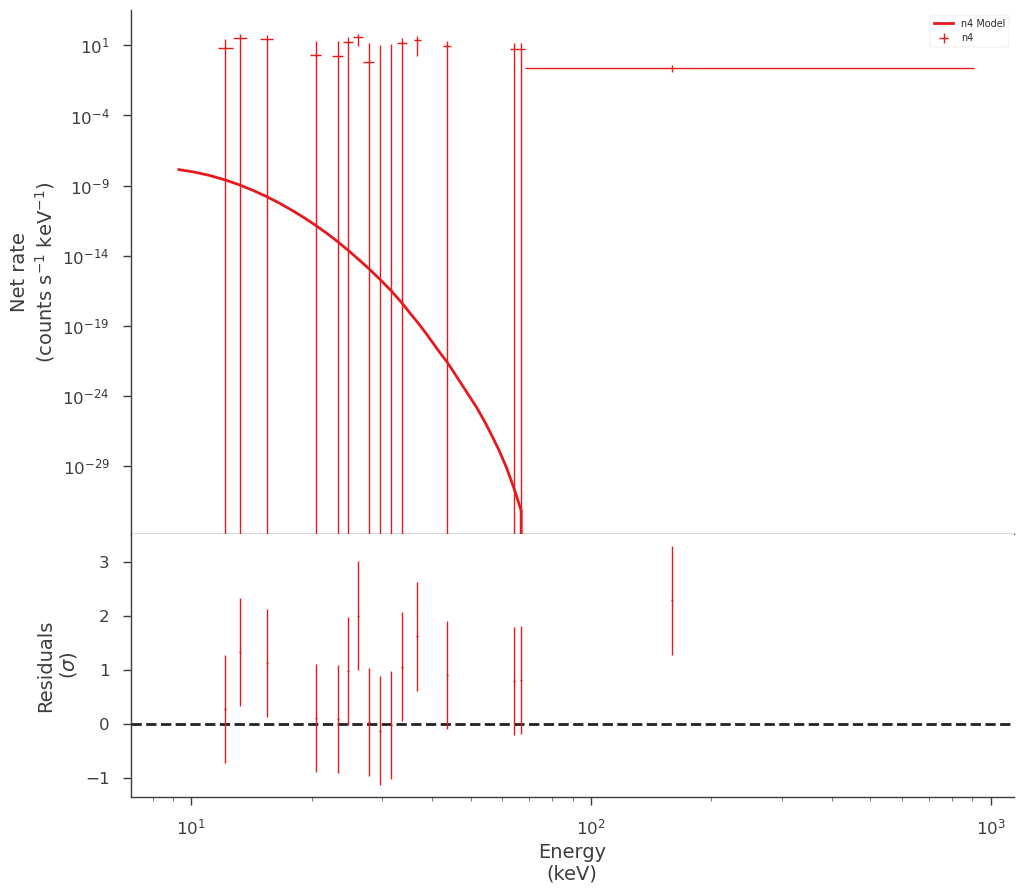

In [ ]:
res = jl.fit()
fig = display_spectrum_model_counts(jl)

In [ ]:
gof_obj = GoodnessOfFit(jl)

gof, data_frame, like_data_frame = gof_obj.by_mc(
    n_iterations=100, continue_on_failure=True
)

print(gof)

Goodness of fit computation:   0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
like_df = res[1]
param_df = res[0]

Goodness of fit (p-value:) 0.26
Meaning that 26.0% of simulations have a larger (worse) likelihood
and 74.0% of simulations have a smaller (better) likelihood than seen in data


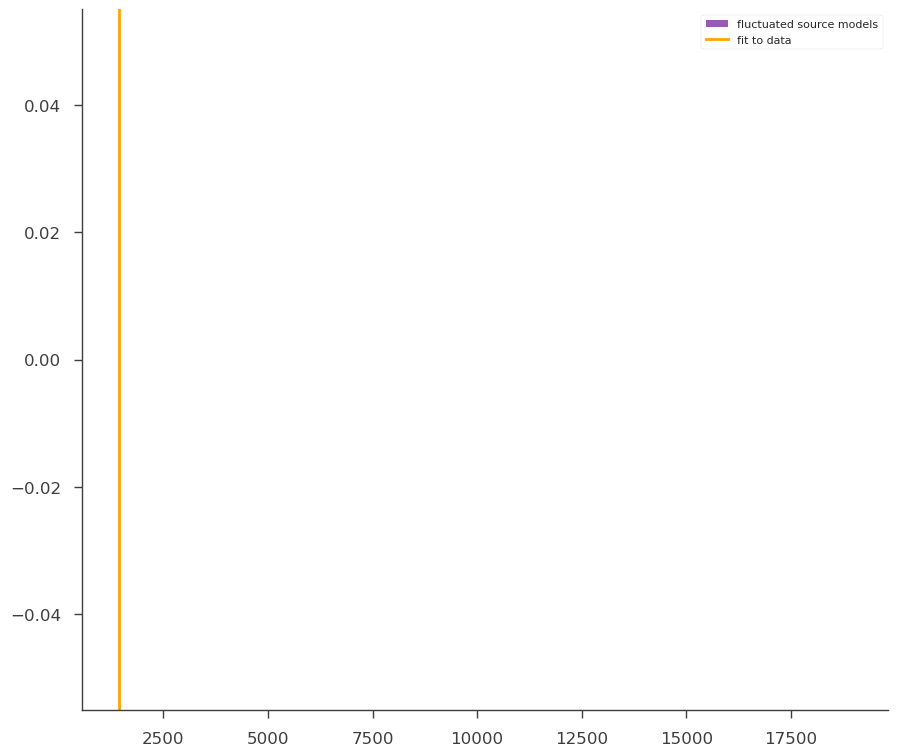

In [ ]:
p = gof["total"]

print("Goodness of fit (p-value:)", p)
print(f"Meaning that {100*p:.1f}% of simulations have a larger (worse) likelihood")
print(f"and {100*(1-p):.1f}% of simulations have a smaller (better) likelihood than seen in data")

df = like_data_frame.reset_index()
df = df[df.level_1 == "total"]

fig, ax = plt.subplots()
ax.hist(df["-log(likelihood)"], label = "fluctuated source models", bins=range(18000,19000,50))
ax.axvline(like_df.loc["total","-log(likelihood)"], label = "fit to data", color = "orange" )
ax.xlabel = "-log(likelihood)"
ax.legend(loc="best")

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 0, 'Energy [TeV]')

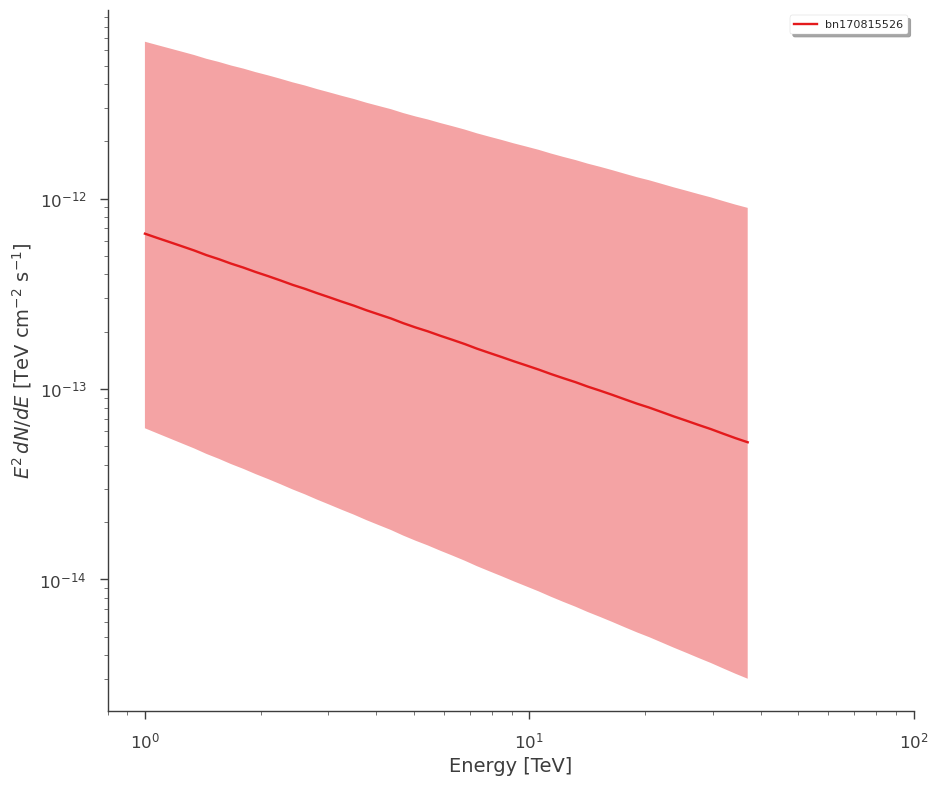

In [ ]:
fig, ax = plt.subplots()
results=jl.results
plot_spectra(results,
                   ene_min=1.0,
                   ene_max=37,
                   num_ene=50,
                   energy_unit='TeV',
                   flux_unit='TeV/(s cm2)',
                   subplot = ax)
ax.set_xlim(0.8,100)
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")

Profiling likelihood:   0%|          | 0/400 [00:00<?, ?it/s]

18:36:46 ERROR     Requested low range for parameter bn170815526.spectrum.main.XS_grbm.tem  ]8;id=526517;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=145378;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#581\581]8;;\
                  (param_2_minim) is below parameter minimum (min2)                                                

ForbiddenRegionOfParameterSpace: 

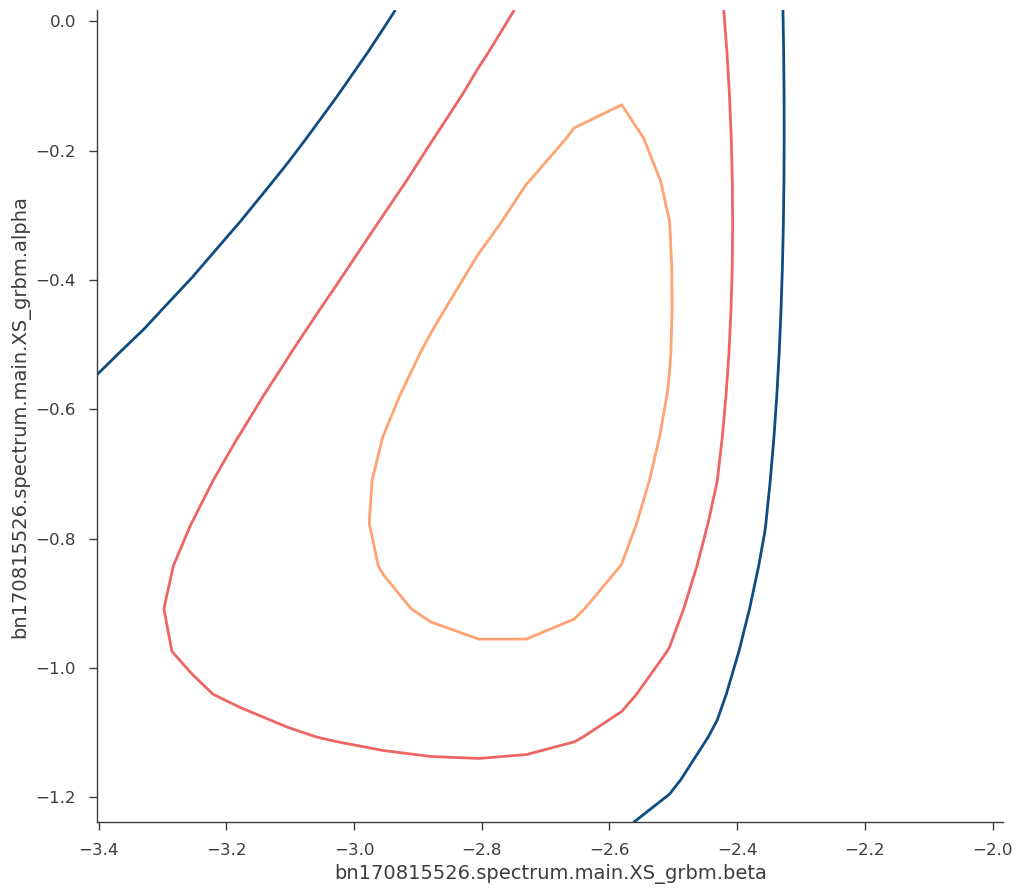

In [ ]:
range_min = {}
range_max = {}

params = model.free_parameters
N_param = len(model.free_parameters.keys() )

for name in params:
    row = param_df.loc[name]
    range_min[name] = row["value"] + 5*row["negative_error"]
    range_max[name] = row["value"] + 5*row["positive_error"]

for i in range(0,N_param):
    p1 = list(params.keys())[i]
    p2 = list(params.keys())[(i+1)%N_param]

    a, b, cc, fig = jl.get_contours(p1, range_min[p1], range_max[p1], 20,
                                p2, range_min[p2], range_max[p2], 20 )